## None Linear Regression

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from sklearn.metrics import r2_score

### define dataset

In [64]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
response = requests.get(url)

with open("china_gdp.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [65]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### preprocessing

In [66]:
x_data, y_data = df["Year"].values, df["Value"].values

x_data.shape, y_data.shape

((55,), (55,))

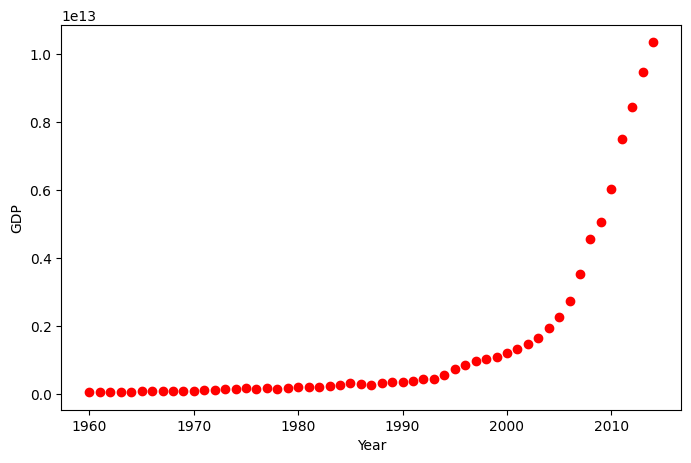

In [67]:
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, "ro")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

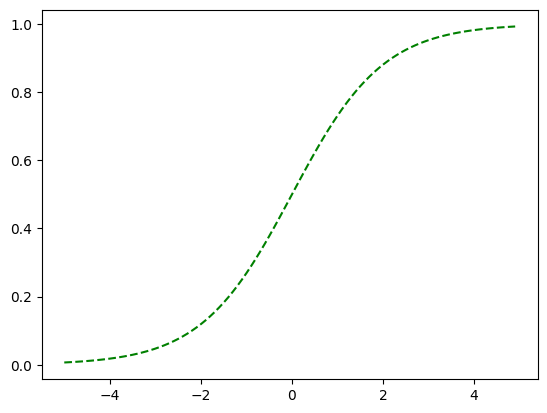

In [72]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, "g--")
plt.show()

In [69]:
msk = np.random.rand(len(df)) < 0.8

x_train, x_test = x_data[msk], x_data[~msk]
y_train, y_test = y_data[msk], y_data[~msk]

x_train.shape, x_test.shape

((44,), (11,))

In [76]:
# normalize data
x_train = x_train / max(x_train)
y_train = y_train / max(y_train)

x_test = x_test / max(x_test)
y_test = y_test / max(y_test)

### model definition

In [84]:
def sigmoid(x, Beta_1=1, Beta_2=0):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

In [88]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_train, y_train)

print(f"Beta_1 : {popt[0]} | Beta_2 : {popt[1]}")

Beta_1 : 681.6854141207349 | Beta_2 : 0.99717409346545


In [ ]:
x = np.linspace(1960, 2014, 55)
x = x / max(x) # normalize x
y = sigmoid(x, *popt)

plt.figure(figsize=(8, 5))
plt.plot(x_train, y_train, "go", label="data")
plt.plot(x, y, "r--", label="fit")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

### model evaluation

In [ ]:
# on test data
y_pred_test = sigmoid(x_test, *popt)

test_mse = np.mean((y_test - y_pred_test) ** 2)
test_mae = np.mean(np.absolute(y_test * y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f"mean squared error : {test_mse:.5f} | mean absolute error : {test_mae:.5f} | r2 score : {test_r2:.5f}".title())

Mean Squared Error : 0.00372 | Mean Absolute Error : 0.13946 | R2 Score : 0.96486


In [93]:
# on train data
y_pred_train = sigmoid(x_train, *popt)

train_mse = np.mean((y_train - y_pred_train) ** 2)
train_mae = np.mean(np.absolute(y_train * y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

print(f"mean squared error : {train_mse:.5f} | mean absolute error : {train_mae:.5f} | r2 score : {train_r2:.5f}".title())

Mean Squared Error : 0.00172 | Mean Absolute Error : 0.06701 | R2 Score : 0.96791
